In [1]:
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
import subprocess

import os
import face_recognition
from sklearn.neighbors import KNeighborsClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [2]:
# Cara el dataset
df = pd.read_pickle('affective_dataset.pkl')
df.head()

,image,face_landmarks,face_closeup,label
0,"[[[165, 165, 162], [165, 166, 161], [165, 166,...","[[[62, 83], [62, 88], [62, 92], [63, 97], [64,...","[[[[160 162 161], [160 162 161], [160 162 161]...",bored
1,"[[[164, 166, 161], [165, 167, 162], [164, 166,...","[[[62, 83], [62, 87], [63, 92], [63, 97], [64,...","[[[[160 162 160], [161 162 161], [160 161 160]...",bored
2,"[[[165, 165, 163], [165, 165, 163], [164, 165,...","[[[63, 82], [63, 87], [63, 91], [63, 96], [65,...","[[[[159 161 158], [160 162 159], [161 162 160]...",bored
3,"[[[165, 166, 162], [165, 165, 163], [165, 165,...","[[[63, 83], [63, 87], [63, 92], [63, 97], [64,...","[[[[159 161 158], [161 163 160], [155 157 154]...",bored
4,"[[[165, 166, 161], [166, 167, 162], [165, 167,...","[[[63, 82], [63, 87], [63, 91], [63, 96], [65,...","[[[[160 162 159], [161 163 161], [152 154 151]...",bored


In [3]:
# Crear una nueva columna para almacenar solo los registros que cumplan con la forma deseada
df['face_landmarks_valid'] = df['face_landmarks'].apply(lambda x: x if np.array(x).shape == (1, 72, 2) else None)

# Eliminar los registros que no cumplen con la forma deseada
df = df.dropna(subset=['face_landmarks_valid'])

# Convertir la columna 'Hitos faciales válidos' en un array NumPy
puntos = np.array(df['face_landmarks_valid'].tolist())

# Verificar la forma de X
print(puntos.shape)

(5035, 1, 72, 2)


In [4]:
flatten = np.array([punto.flatten() for punto in puntos])
print(flatten.shape)

(5035, 144)


In [5]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['label'])

In [6]:
X_train, X_test, y_train, y_test = train_test_split(flatten, y, test_size=0.2, random_state=42)

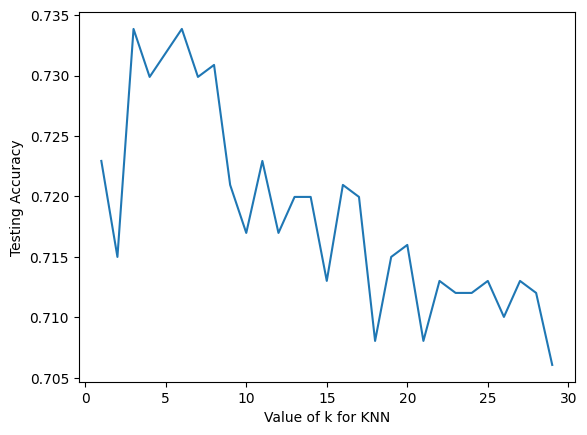

In [12]:
# Genera la grafica de precision por numero de vecinos
# aplico la tecnica del codo para determinar el numero de vecinos
k_range = list(range(1,30))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))

plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Testing Accuracy')
plt.show()
    

In [10]:
# selecciono un numero impar de vecinos que me de la mejor precision
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [11]:
# Realizar predicciones en el conjunto de prueba
y_pred = knn.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7298907646474677


In [13]:
#Guardando los parametros del modelo
import joblib

joblib.dump(knn, 'affective_KNN_trainned_729acc.pkl')

['affective_KNN_trainned_729acc.pkl']